# Federated Learning

In [64]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from kernel import Kernel

from klms import *
from knlms import *
from krls import *
from klms_rff import *
from knlms_rff import *
from krls_rff import *

# Multiprocessing
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [65]:
def generate_data(num_data):
    # AWGN
    v = 0.1*np.random.normal(0,1,num_data+2) 

    # Initial conditions
    d_true =[0.1 , 0.1]
    d = [d_true[0] + v[0], d_true[1] + v[1]]

    # Grab new data
    new_d_true = lambda d: d.append((0.8 - 0.5 * np.exp(-(d[-1]**2)))*d[-1] - (0.3 + 0.9*np.exp(-(d[-1]**2)))*d[-2] + 0.1*np.sin(np.pi*d[-1]))
    for i in range(2,num_data+2):
        new_d_true(d_true)
        d.append(d_true[-1] + v[i])

    u = np.hstack((np.array(d[0:num_data]).reshape(num_data,1),np.array(d[1:num_data+1]).reshape(num_data,1)))
    d_true = d_true[2::]
    d = d[2::]
    return np.array(u), np.array(d),np.array(d_true)

In [36]:
# # Data prepocessing for K clients
# edges_u = []
# edges_d = []
# edges_d_true = []
# for k in range(K):
#     u,d,d_true = generate_data(num_data)
    
#     edges_u.append(np.array(u))
#     edges_d.append(np.array(d))
#     edges_d_true.append(np.array(d_true))

In [5]:
# Parameters
num_data = 3000
kernel = Kernel(3.73)
K = 10 # K edge clients
step_size = 0.09
reg_coeff = 0.03
threshold = 0.5

In [41]:
# Federated learning: Synchronous updating rule

l = 50 # l updates for synchronous
c =  np.ones(K).reshape(K,1)/K # edge weighting, for now, lets try that all data is being received synchronously
D = 100 # Dictionary size

iteration = 6000
y = np.zeros(K)
alpha = np.zeros((D,1))
alphas = np.zeros((K,D))

final_mse = []
err = np.array([])
mse=0

# Process data and kernel
u,d,d_true = generate_data(num_data)
sigma = 1/np.sqrt(2*kernel_params.sigma)
W = (1/sigma) * np.random.normal(loc=0, scale=sigma, size=(2,D))
b = np.random.uniform(0,2*np.pi,D).reshape(D,1)
h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)
for n in tqdm(range(iteration)):

    # Local updates
    i = np.random.choice(range(num_data))
    edge = np.random.choice(range(K))

    u_k = u[i]
    d_k = d[i]
    d_true_k = d_true[i]

    if l_idx == 0:
        err,h,alpha_k = KLMS_RFF(u_k,d_true_k,kernel,step_size,D,alpha_0=alpha)
    else:
        err,h,alpha_k = KLMS_RFF(u_k,d_true_k,kernel,step_size,D,alpha_0=alphas[k])    
    alphas[k] = alpha_k[0]

    mse += ((np.array(d_true_k) - np.array(d_k) + err)**2)/K

    final_mse.append(mse[0])
    mse = 0
    if n % l == 0:

        # Global update
#         y = A * y + (c @ y_hat.T)
        alpha = (alphas.T @ c)
        l_idx = 0

  0%|                                                  | 0/6000 [00:00<?, ?it/s]


ValueError: cannot reshape array of size 1 into shape (2,1)

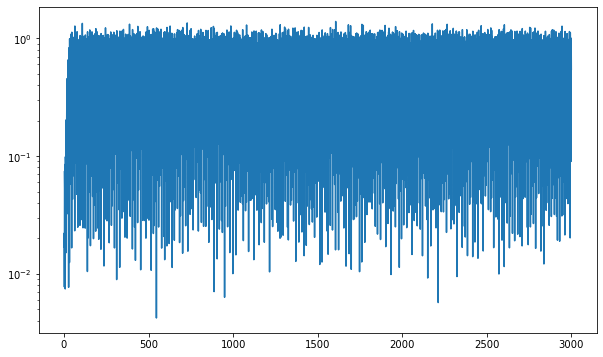

In [11]:
plt.figure(figsize=(10, 6))
plt.semilogy(range(len(final_mse)),final_mse)

In [38]:
# Federated learning: Asynchronous updating rule

In [60]:
sigma = 1/np.sqrt(2*kernel.sigma)
W = (1/sigma) * np.random.normal(loc=0, scale=sigma, size=(2,D))
b = np.random.uniform(0,2*np.pi,D).reshape(D,1)
h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)


In [59]:
a = W.T @ u.T + b
a.shape

(100, 3000)

In [54]:
u.shape

(3000, 2)

In [57]:
W.T.shape

(100, 2)

In [51]:
b.shape

(100, 1)

In [63]:
z= 1
-z

-1